# Predicting the car price

This article is partly based on the following article: <a href="https://www.kaggle.com/code/mohaiminul101/car-price-prediction/notebook">Car Price Prediction</a>.

In [1]:
### Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# train_test_split divides data into train data a test data
from sklearn.model_selection import train_test_split

# Models to be used
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

## Function for fitting and viewing the model

If the same code is used repeatedly, it should be made into a function. Here we apply this idea to the models used in this example.

In [2]:
def modelling(model):
    
    # Fitting the model to the training data
    model.fit(X_train, y_train)
            
    # The coefficient of determination, R squared, for training data
    y_pred_train = model.predict(X_train)
    R2_train_model = model.score(X_train, y_train)
    
    # The coefficient of determination, R squared, for test data 
    y_pred_test = model.predict(X_test)
    R2_test_model = model.score(X_test, y_test)
    
    # Printout of the coefficients of determination
    print(f'Coefficient of determination for training data: {R2_train_model:.3f}')
    print(f'Coefficient of determination for test data:  {R2_test_model:.3f}')
       
    # Error terms for teaching data as a chart
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    ax[0].set_title('Distribution of error terms in teaching data')
    sns.histplot((y_train-y_pred_train), kde=True, ax=ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Realized and predicted values for test data as a scatter chart
    ax[1].set_title('Realized and predicted values for test data')
    ax[1].scatter(x=y_test, y=y_pred_test)
    ax[1].set_xlabel('realized')
    ax[1].set_ylabel('predicted')

### Examining data

In [3]:
df = pd.read_csv('http://myy.haaga-helia.fi/~menetelmat/Data-analytiikka/Teaching/en/car_data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
### Missing values

df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Convert Year to the age of the car, assuming the data is from 2020.

In [7]:
df['Age'] = 2020 - df['Year']
df = df.drop('Year', axis=1)

In [8]:
### Drop Car_Name, it is not needed.

df = df.drop('Car_Name', axis=1)

Next we study distributions of categorical variables.

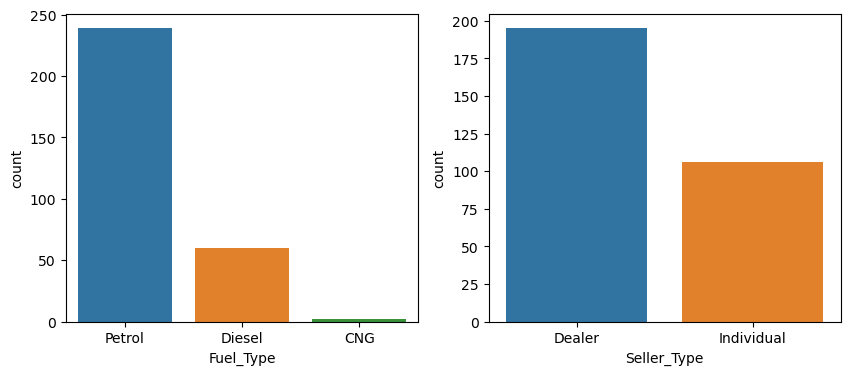

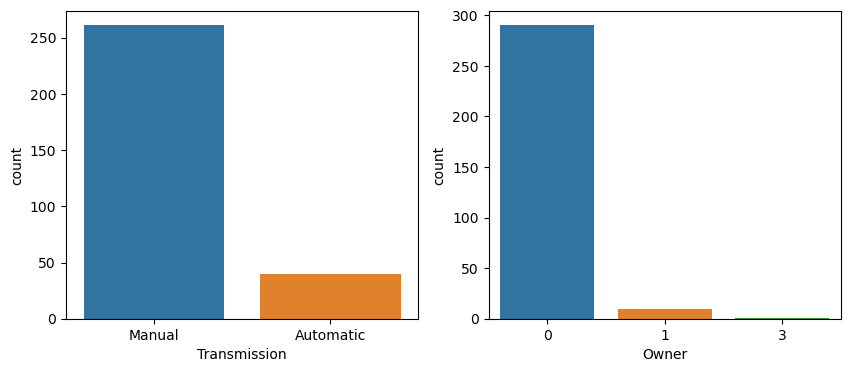

In [9]:
cat_cols = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

for i in range(0, 3, 2):
    fig = plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.countplot(x=cat_cols[i], data=df)
    plt.subplot(1, 2, 2)
    sns.countplot(x=cat_cols[i + 1], data=df)

And then distributions of quantitative variables.

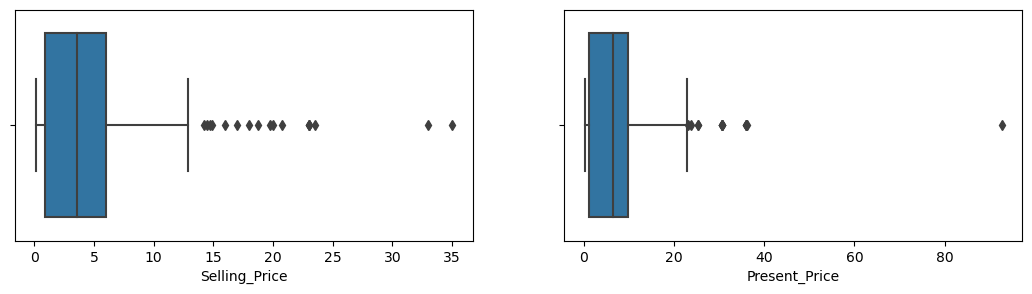

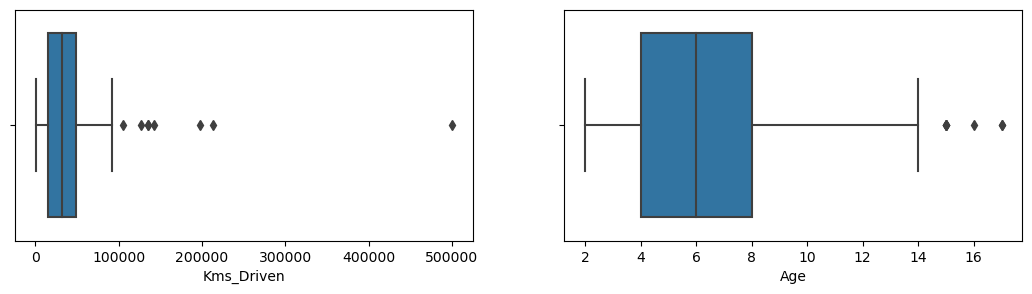

In [10]:
num_cols = ['Selling_Price', 'Present_Price', 'Kms_Driven', 'Age']

for i in range(0, 3, 2):
    fig = plt.figure(figsize=(13, 3))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=num_cols[i], data=df)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=num_cols[i + 1], data=df)

Correlations in turn are as follows.

C:\Users\nurju\AppData\Local\Temp\ipykernel_28068\621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

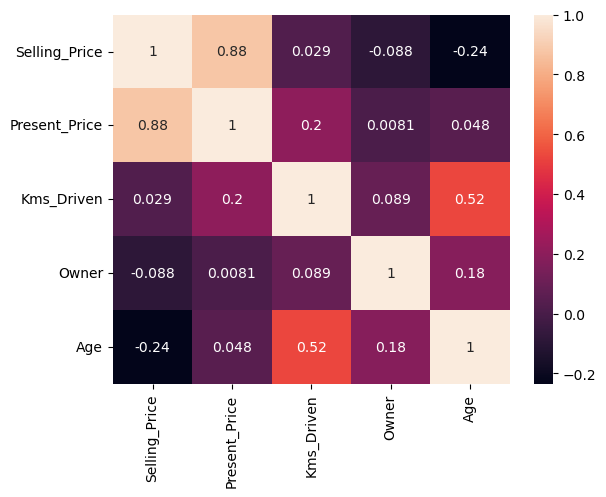

In [11]:
sns.heatmap(df.corr(), annot=True)

Let's have a look at the data again. Notice that there are quantitative and categorical variables.

In [12]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


We convert categorical variables to indicator (dummy) variables.

In [13]:
df = pd.get_dummies(data=df, drop_first=True) 

Let's now have a look at the data. See what happened.

In [14]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


## Fitting the models

In [15]:
### Independent variables

X = df.drop('Selling_Price', axis = 1)

# Dependent
y = df['Selling_Price']

In [16]:
# Dividing into training and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2)

### Linear regression

Coefficient of determination for training data: 0.888
Coefficient of determination for test data:  0.842


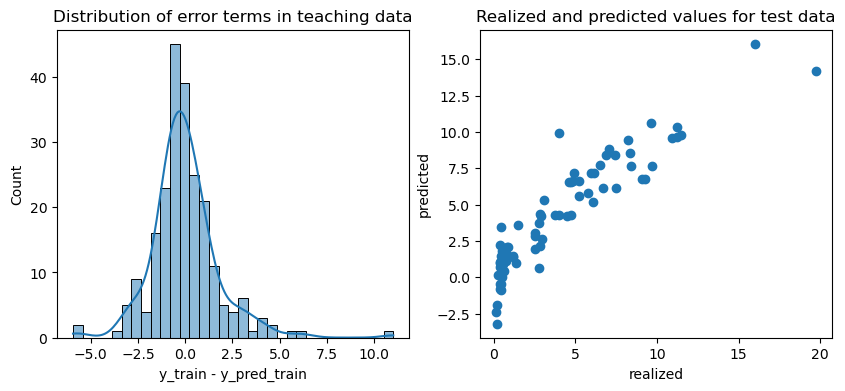

In [17]:
model = LinearRegression()

# Utilizing the previously defined function

modelling(model)

### Random forest

Coefficient of determination for training data: 0.987
Coefficient of determination for test data:  0.953


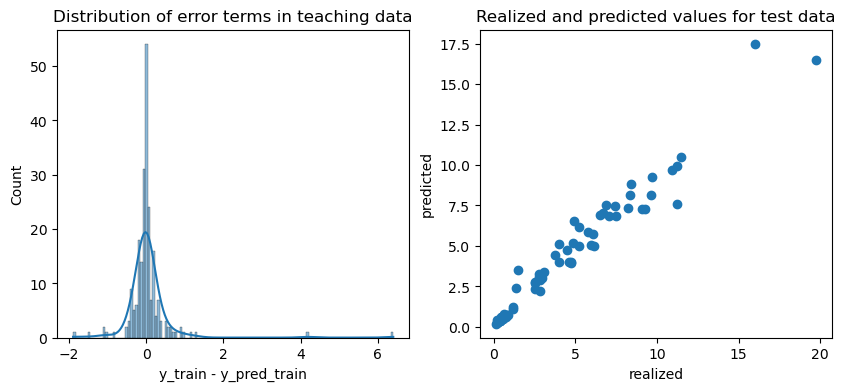

In [18]:
model = RandomForestRegressor()

modelling(model)

### Gradient boosting

Coefficient of determination for training data: 0.997
Coefficient of determination for test data:  0.956


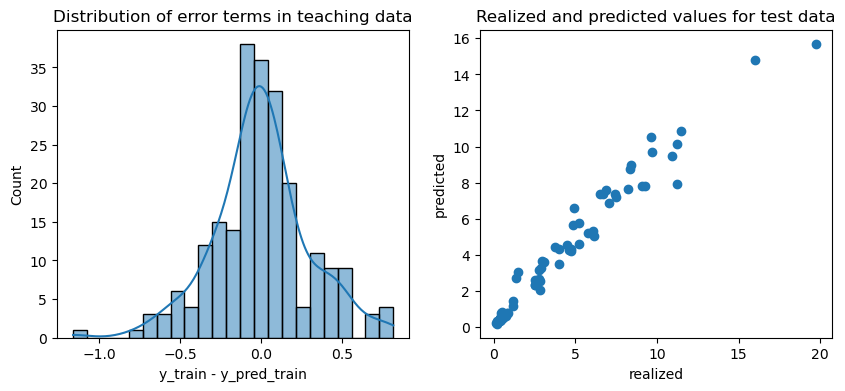

In [19]:
model = GradientBoostingRegressor()

modelling(model)

Source and origin of inspiration:<br /> 
Aki Taanila: Data-analytiikka Pythonilla: <a href="https://tilastoapu.wordpress.com/python/">https://tilastoapu.wordpress.com/python/</a>.

In [20]:
import datetime
print(f'Last modified {datetime.datetime.now():%Y-%m-%d %H:%M} by Juha Nurmonen')

Last modified 2023-03-20 22:29 by Juha Nurmonen
